In [1]:
from process import *

In [2]:
data_frame = process_data()

100%|██████████| 124/124 [00:29<00:00,  4.18it/s]


In [3]:
data_frame

,repository,label,owner,name,watchers,description,mentionableUsers,closed_pull_requests,closed_issues,open_issues,forks,merged_pull_requests,stargazers,open_pull_requests,projects,size,readme,LANGUAGE_Objective-C,LANGUAGE_Shell,LANGUAGE_C,isOwnerHomepage,hasHomepage,hasLicense,hasCiConfig,commitsCount,branchesCount,tagsCount,releasesCount,LANGUAGE_Python,LANGUAGE_JavaScript,LANGUAGE_HTML,LANGUAGE_Perl,LANGUAGE_CSS,LANGUAGE_Swift,LANGUAGE_TeX,LANGUAGE_Ruby,LANGUAGE_Makefile,LANGUAGE_Groovy,LANGUAGE_Java,LANGUAGE_FreeMarker,LANGUAGE_XSLT,LANGUAGE_SQLPL,LANGUAGE_Smarty,LANGUAGE_Batchfile,LANGUAGE_FORTRAN,LANGUAGE_Common Lisp,LANGUAGE_PostScript,LANGUAGE_APL,LANGUAGE_PHP,LANGUAGE_TypeScript,LANGUAGE_C++,LANGUAGE_CoffeeScript,LANGUAGE_Jupyter Notebook,LANGUAGE_Matlab,LANGUAGE_Go,LANGUAGE_R,LANGUAGE_Julia,LANGUAGE_Smalltalk
0,briantemple/homeworkr,DEV,briantemple,homeworkr,1.0,A simple rails app to handle homework assignme...,1.0,0.0,0.0,0.0,2.0,0.0,6.0,0.0,0.0,226.0,HomeworkrHomeworkr is a simple rails app to h...,NaN,NaN,NaN,False,True,True,False,30.0,2.0,0.0,0.0,NaN,0.114283,NaN,NaN,NaN,NaN,NaN,0.885717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,spring-projects/spring-boot,DEV,spring-projects,spring-boot,1129.0,Spring Boot,298.0,1344.0,5247.0,628.0,7758.0,29.0,8118.0,73.0,0.0,55554.0,Spring Boot image:https://buildspringio/plugi...,NaN,0.002114,NaN,False,True,True,True,9241.0,9.0,65.0,0.0,NaN,0.003724,0.007302,NaN,0.000568,NaN,NaN,0.000129,NaN,0.004679,0.970968,0.00021,0.003361,0.005938,0.000323,0.000685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,facebook/react,DEV,facebook,react,3711.0,"A declarative, efficient, and flexible JavaScr...",860.0,1246.0,3336.0,582.0,9078.0,2919.0,52781.0,99.0,0.0,143338.0,Reacthttps://facebookgithubio/react/ Build St...,NaN,0.000179,0.001824,False,True,True,True,7409.0,31.0,52.0,45.0,0.003204,0.970204,NaN,NaN,NaN,NaN,NaN,NaN,0.000065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005143,0.015357,0.004025,NaN,NaN,NaN,NaN,NaN,NaN
3,nodegit/nodegit,DEV,nodegit,nodegit,61.0,Native Node bindings to Git.,101.0,60.0,463.0,134.0,338.0,497.0,2206.0,16.0,0.0,29623.0,NodeGit------- Node bindings to the libgit2htt...,NaN,0.001473,0.002365,False,False,True,True,2860.0,11.0,63.0,42.0,0.004150,0.760207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.231806,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,scipy/scipy,DEV,scipy,scipy,229.0,Scipy library main repository,427.0,678.0,3013.0,932.0,1531.0,2116.0,2663.0,143.0,0.0,79668.0,image:: https://travis-ciorg/scipy/scipypngbr...,NaN,0.000104,0.193934,False,False,True,True,16270.0,15.0,88.0,13.0,0.517658,NaN,NaN,NaN,NaN,NaN,0.002453,NaN,0.000037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.262458,NaN,NaN,NaN,NaN,NaN,0.023151,NaN,NaN,0.000205,NaN,NaN,NaN,NaN
5,spez/RottenTomatoes,HW,spez,RottenTomatoes,1.0,CodePath week 1 homework,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2064.0,RottenTomatoes Box Office DemoTime spent: 10 ...,0.972532,0.007425,0.020043,False,False,True,False,18.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,m2mtech/calculator-2015,HW,m2mtech,calculator-2015,25.0,Calculator of the cs193p lecture (Winter 2015),1.0,2.0,1.0,1.0,28.0,0.0,70.0,1.0,0.0,518.0,Calculator of the cs193p lecture Winter 2015w...,NaN,NaN,NaN,False,False,False,False,45.0,11.0,34.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,bcaffo/751and2,HW,bcaffo,751and2,7.0,Class github repository for 751 and 2; doctora...,1.0,0.0,0.0,2.0,23.0,0.0,7.0,2.0,0.0,16773.0,751 and 2 Instructor: Brian Caffo PhD ...,NaN,0.000184,NaN,False,False,False,False,33.0,2.0,0.0,0.0,NaN,NaN,0.733993,NaN,NaN,NaN,0.265823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,HPI-SWA-Teaching/SWT16-Project-08,HW,HPI-SWA-Teaching,SWT16-Project-08,9.0,

100%|██████████| 10/10 [00:06<00:00,  1.43it/s]


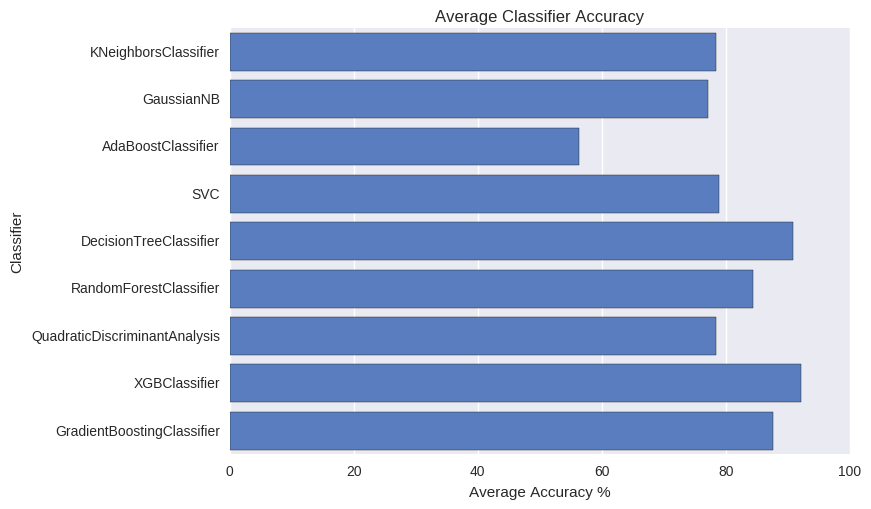

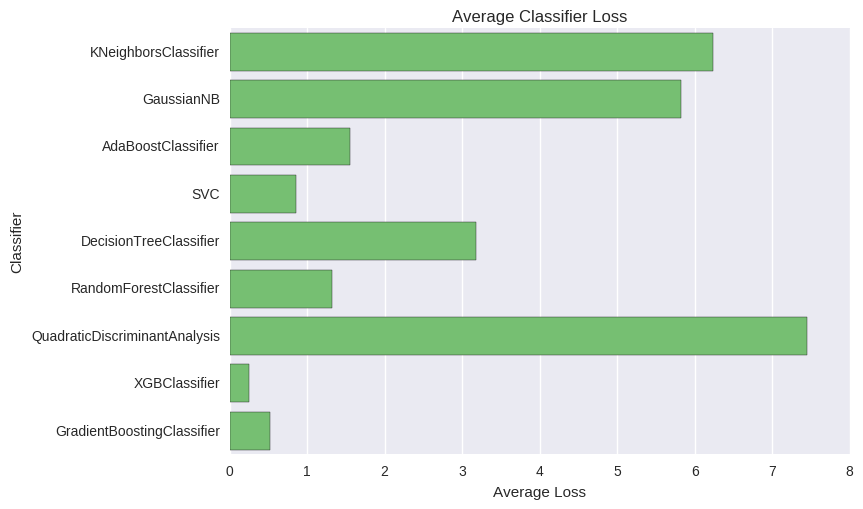

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from tqdm import tqdm
sns.set_color_codes("muted")

data_frame = pd.read_csv('data/processed_data.csv')

le = LabelEncoder().fit(data_frame.label) 
labels = le.transform(data_frame.label)  
sss = StratifiedShuffleSplit(labels, 10, test_size=0.3, random_state=23)

data_frame.drop('readme', axis=1, inplace=True)
data_frame.drop('description', axis=1, inplace=True)
data_frame.drop('repository', axis=1, inplace=True)
data_frame.drop('owner', axis=1, inplace=True)
data_frame.drop('name', axis=1, inplace=True)
data_frame.drop('label', axis=1, inplace=True)
data_frame.fillna(0, inplace=True)

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    #NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    #LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    XGBClassifier()]

classifier_accs = {}
classifier_loss = {}
for clf in classifiers:
    classifier_accs[clf.__class__.__name__] = 0
    classifier_loss[clf.__class__.__name__] = 0

for train_index, test_index in tqdm(sss):
    X_train, X_test = data_frame.values[train_index], data_frame.values[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

    for clf in classifiers:
        clf.fit(X_train, y_train)
        name = clf.__class__.__name__
        train_predictions = clf.predict(X_test)
        acc = accuracy_score(y_test, train_predictions)
        classifier_accs[name] += acc

        train_predictions = clf.predict_proba(X_test)
        ll = log_loss(y_test, train_predictions)
        classifier_loss[name] += ll

avg_acc = {k: v*100 / len(sss) for k, v in classifier_accs.iteritems()}
avg_loss = {k: v / len(sss) for k, v in classifier_loss.iteritems()}
avg_df = pd.DataFrame([[name, acc, avg_loss[name]] for name, acc in avg_acc.iteritems()], columns=['Classifier', 'Avg Accuracy', 'Avg Loss'])

sns.barplot(x='Avg Accuracy', y='Classifier', data=avg_df, color="b")
plt.xlabel('Average Accuracy %')
plt.title('Average Classifier Accuracy')
plt.show()

sns.barplot(x='Avg Loss', y='Classifier', data=avg_df, color="g")
plt.xlabel('Average Loss')
plt.title('Average Classifier Loss')
plt.show()